In [10]:
##### Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset (replace 'heart.csv' with your dataset)
data = pd.read_csv('heart5.csv')

# Preprocessing the data
X = data.drop('target', axis=1)
y = data['target']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predicting on user input data
def predict_heart_disease(cp, trestbps, chol, fbs, restecg, thalach, slope):
    user_data = np.array([[cp, trestbps, chol, fbs, restecg, thalach, slope]])
    user_data = scaler.transform(user_data)
    prediction = model.predict(user_data)
    if prediction[0] == 0:
        return "No heart disease detected."
    else:
        return "Heart disease detected."

# Example usage
cp = int(input("Enter chest pain type (0-3): "))
trestbps = int(input("Enter resting blood pressure (mm Hg): "))
chol = int(input("Enter serum cholestoral (mg/dl): "))
fbs = int(input("Enter fasting blood sugar (> 120 mg/dl, 1 for true, 0 for false): "))
restecg = int(input("Enter resting electrocardiographic results (0-2): "))
thalach = int(input("Enter maximum heart rate achieved: "))
slope = int(input("Enter the slope of the peak exercise ST segment (0-2): "))

result = predict_heart_disease(cp, trestbps, chol, fbs, restecg, thalach, slope)
print(result)


Enter chest pain type (0-3):  0
Enter resting blood pressure (mm Hg):  112
Enter serum cholestoral (mg/dl):  149
Enter fasting blood sugar (> 120 mg/dl, 1 for true, 0 for false):  0
Enter resting electrocardiographic results (0-2):  1
Enter maximum heart rate achieved:  125
Enter the slope of the peak exercise ST segment (0-2):  1


Heart disease detected.


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9853658536585366


In [7]:
import pandas as pd

# Load the dataset
data = pd.read_csv('heart5.csv')

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Print correlation matrix
print(correlation_matrix)

                cp  trestbps      chol       fbs   restecg   thalach  \
cp        1.000000  0.038177 -0.081641  0.079294  0.043581  0.306839   
trestbps  0.038177  1.000000  0.127977  0.181767 -0.123794 -0.039264   
chol     -0.081641  0.127977  1.000000  0.026917 -0.147410 -0.021772   
fbs       0.079294  0.181767  0.026917  1.000000 -0.104051 -0.008866   
restecg   0.043581 -0.123794 -0.147410 -0.104051  1.000000  0.048411   
thalach   0.306839 -0.039264 -0.021772 -0.008866  0.048411  1.000000   
slope     0.131633 -0.120445 -0.014248 -0.061902  0.086086  0.395308   
target    0.434854 -0.138772 -0.099966 -0.041164  0.134468  0.422895   

             slope    target  
cp        0.131633  0.434854  
trestbps -0.120445 -0.138772  
chol     -0.014248 -0.099966  
fbs      -0.061902 -0.041164  
restecg   0.086086  0.134468  
thalach   0.395308  0.422895  
slope     1.000000  0.345512  
target    0.345512  1.000000  


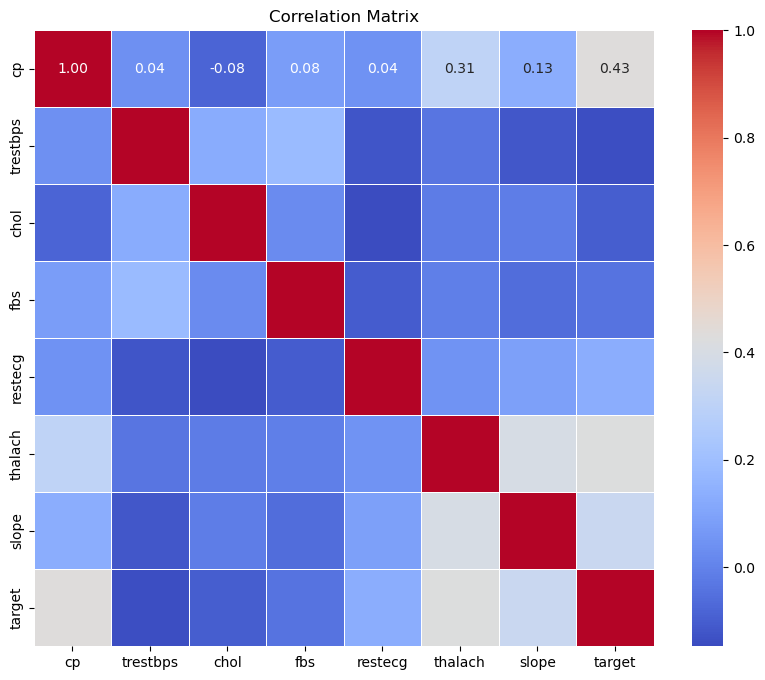

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()